In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [908]:
csv_path = 'data'
interval_time = '15min'
csv_file = os.path.join(os.getcwd(), csv_path, 'export_device_1_basic_aggregated_15minutes.csv')
df = pd.read_csv(csv_file)
df.pop('Device ID')
df.pop('End Time')
df.pop('Record Count')
row_count = df.shape[0]
print(f"Total rows: {row_count}")
df.head(5)

Total rows: 78413


,Start Time,Grid Feed In,External Energy Supply,Internal Power Supply,Current Power,Self Consumption,Ambient Temperature,Module Temperature,Total Irradiation
0,2021-11-06 11:00:00,9080.8,0.0,37015.066667,46095.866667,37015.066667,30.046667,57.706667,79.340000
1,2021-11-06 11:15:00,9427.4,1.6,37756.825000,47184.225000,37756.825000,30.140833,58.147500,80.698333
2,2021-11-06 11:30:00,11218.2,258.0,36041.425000,47259.625000,36041.425000,30.385833,57.361667,81.116667
3,2021-11-06 11:45:00,14011.4,0.0,33460.216667,47471.616667,33460.216667,31.025833,57.097500,80.676667
4,2021-11-06 12:00:00,11030.2,0.0,38093.108333,49123.308333,38093.108333,31.340000,56.047500,81.843333


In [852]:
# Check what years exist in your dataset
date_col = 'Start Time'  # Replace with your actual column name

# Ensure timestamp column is datetime type
if df[date_col].dtype != 'datetime64[ns]':
    df[date_col] = pd.to_datetime(df[date_col])

In [853]:
print(df[date_col].dt.year.unique())
print(df[date_col].dt.year.value_counts())

[2021 2022 2023 2024 2025]
2023    31394
2022    25611
2024    12600
2025     4836
2021     3972
Name: Start Time, dtype: int64


In [854]:
# Create complete time range with 15-minute intervals
start_date = pd.Timestamp('2021-11-06 11:00:00')
end_date = pd.Timestamp('2025-06-06 03:00:00')
complete_index = pd.date_range(start=start_date, end=end_date, freq=interval_time)

In [855]:
# Create a DataFrame with the complete index
df_complete = pd.DataFrame(index=complete_index)
# Join with original data
df_indexed = df.set_index(date_col)
df_with_all_times = df_complete.join(df_indexed)

In [856]:
# Print missing data statistics
missing_count = df_with_all_times.isna().any(axis=1).sum()
print(f"Found {missing_count} missing timestamps out of {len(complete_index)} expected")

Found 56973 missing timestamps out of 125537 expected


In [858]:
# Fill missing values using multiple methods
df_filled = df_with_all_times.copy()

# Interpolate small gaps (up to 1 hour = 4 timestamps)
df_filled = df_filled.interpolate(method='time', limit=4)

# Create time features
df_filled['is_weekend'] = df_filled.index.dayofweek >= 5
len(df_filled)

125537

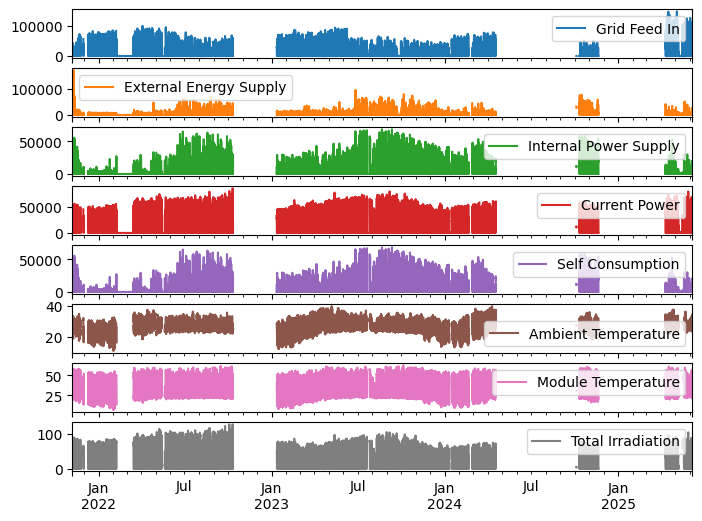

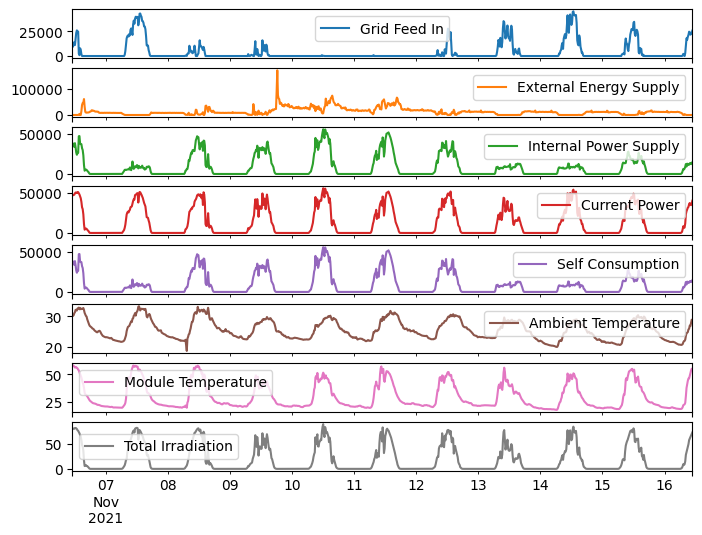

In [859]:
plot_cols = ['Grid Feed In', 'External Energy Supply', 'Internal Power Supply', 'Current Power', 'Self Consumption', 'Ambient Temperature', 'Module Temperature', 'Total Irradiation']
plot_features = df_filled[plot_cols]
plot_features.index = complete_index
_ = plot_features.plot(subplots=True)

plot_features = df_filled[plot_cols][:960]
plot_features.index = complete_index[:960]
_ = plot_features.plot(subplots=True)

In [860]:
nan_rows = df_filled[df_filled.isna().any(axis=1)]
nan_rows

,Grid Feed In,External Energy Supply,Internal Power Supply,Current Power,Self Consumption,Ambient Temperature,Module Temperature,Total Irradiation,is_weekend
2021-11-20 06:45:00,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,True
2021-11-20 07:00:00,0.0,793.770492,2108.122951,2108.122951,2108.122951,NaN,NaN,NaN,True
2021-11-23 18:15:00,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,False
2021-11-23 18:30:00,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,False
2021-11-23 18:45:00,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
2025-05-31 17:15:00,2088.0,0.000000,859.500000,2947.500000,859.500000,NaN,NaN,NaN,True
2025-05-31 17:30:00,7014.0,0.000000,0.000000,6375.000000,0.000000,NaN,NaN,NaN,True
2025-06-02 20:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2025-06-03 15:45:00,17328.0,0.000000,0.000000,11209.333333,0.000000,NaN,NaN,NaN,False


In [861]:
# Replace all NaN values in the DataFrame with 0
df_filled = df_filled.fillna(0)

In [862]:
# Count NaNs in each column
print(df_filled.isna().sum())

Grid Feed In              0
External Energy Supply    0
Internal Power Supply     0
Current Power             0
Self Consumption          0
Ambient Temperature       0
Module Temperature        0
Total Irradiation         0
is_weekend                0
dtype: int64


In [863]:
df_filled.min()

Grid Feed In                0.0
External Energy Supply      0.0
Internal Power Supply       0.0
Current Power               0.0
Self Consumption            0.0
Ambient Temperature         0.0
Module Temperature          0.0
Total Irradiation           0.0
is_weekend                False
dtype: object

In [864]:
df_filled.max()

Grid Feed In               146799.0
External Energy Supply     170720.6
Internal Power Supply       68121.0
Current Power               84700.0
Self Consumption            68121.0
Ambient Temperature       39.829915
Module Temperature        62.266667
Total Irradiation             128.4
is_weekend                     True
dtype: object

Text(0, 0.5, 'Total Irradiation')

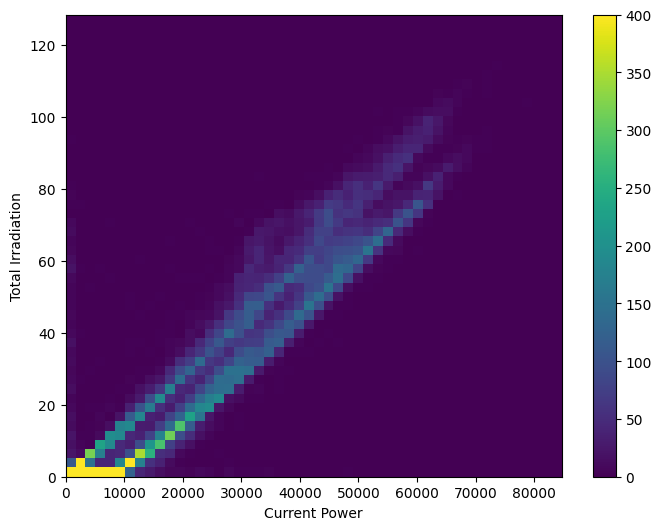

In [865]:
plt.hist2d(df_filled['Current Power'], df_filled['Total Irradiation'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Current Power')
plt.ylabel('Total Irradiation')

In [888]:
# List of columns to check for zeros
zero_columns = [
    'Grid Feed In', 
    'External Energy Supply', 
    'Internal Power Supply', 
    'Current Power', 
    'Self Consumption', 
    'Ambient Temperature', 
    'Module Temperature', 
    'Total Irradiation'
]

# Create a copy of the dataframe
df_fixed = df_filled.copy()

# Variables from your code
year_to_fix = 2025
year_from = 2024

# Correctly create the year to fix mask
mask_year = df_filled.index.year == year_to_fix

# Check which columns actually exist in the dataframe
valid_columns = [col for col in zero_columns if col in df.columns]
if len(valid_columns) != len(zero_columns):
    missing = set(zero_columns) - set(valid_columns)
    print(f"Warning: Some columns not found: {missing}")

# Create date pattern columns BEFORE any filtering
df_filled['date_pattern'] = df_filled.index.strftime('%m-%d %H:%M')

# Find year rows with zeros (using your existing mask)
mask_year = df_filled.index.year == year_to_fix
zero_mask = df_filled[valid_columns].eq(0).all(axis=1)
mask_zeros = mask_year & zero_mask
rows_to_fix = df_filled[mask_zeros].copy()
rows_to_fix

,Grid Feed In,External Energy Supply,Internal Power Supply,Current Power,Self Consumption,Ambient Temperature,Module Temperature,Total Irradiation,is_weekend,date_pattern
2025-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,01-01 00:00
2025-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,01-01 00:15
2025-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,01-01 00:30
2025-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,01-01 00:45
2025-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,01-01 01:00
...,...,...,...,...,...,...,...,...,...,...
2025-05-19 07:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,05-19 07:30
2025-05-19 07:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,05-19 07:45
2025-05-19 08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,05-19 08:00
2025-05-19 08:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,05-19 08:15


In [889]:
# Create lookup DataFrame from source year
source_mask = df_filled.index.year == year_from
source_data = df_filled[source_mask]
lookup_df = source_data.drop_duplicates('date_pattern').set_index('date_pattern')[valid_columns]
lookup_df

,Grid Feed In,External Energy Supply,Internal Power Supply,Current Power,Self Consumption,Ambient Temperature,Module Temperature,Total Irradiation
date_pattern,,,,,,,,
01-01 00:00,0.0,7886.400000,0.0,0.0,0.0,18.020000,14.900000,0.0
01-01 00:15,0.0,6411.200000,0.0,0.0,0.0,17.951176,14.797059,0.0
01-01 00:30,0.0,6748.235294,0.0,0.0,0.0,17.882353,14.694118,0.0
01-01 00:45,0.0,6600.000000,0.0,0.0,0.0,17.566667,14.366667,0.0
01-01 01:00,0.0,6984.000000,0.0,0.0,0.0,17.333333,14.266667,0.0
...,...,...,...,...,...,...,...,...
12-31 22:45,0.0,6440.000000,0.0,0.0,0.0,19.100000,15.600000,0.0
12-31 23:00,0.0,6696.000000,0.0,0.0,0.0,19.025000,15.550000,0.0
12-31 23:15,0.0,7124.000000,0.0,0.0,0.0,18.633333,15.200000,0.0


In [890]:
# Find which patterns harows_to_fixve matches and update them
matching_patterns = rows_to_fix['date_pattern'].isin(lookup_df.index)
matching_indices = rows_to_fix.loc[matching_patterns].index
print(f"Found {len(matching_indices)} rows with matching patterns in {year_from}")

Found 10502 rows with matching patterns in 2024


In [891]:
# Update values for all matching rows at once
if len(matching_indices) > 0:
    for col in valid_columns:
        # Get the replacement values from the lookup table
        replacement_values = rows_to_fix.loc[matching_indices, 'date_pattern'].map(lookup_df[col])
        
        # Update the values in df_fixed
        df_fixed.loc[matching_indices, col] = replacement_values

print(f"Fixed {len(matching_indices)} out of {len(rows_to_fix)} rows")

# Clean up the temporary column - only if it exists
if 'date_pattern' in df_fixed.columns:
    df_fixed = df_fixed.drop('date_pattern', axis=1)
if 'date_pattern' in df.columns:
    df = df.drop('date_pattern', axis=1)

Fixed 10502 out of 10502 rows


In [892]:
# Create a copy of the dataframe
df_filled = df_fixed.copy()
len(df_filled)

125537

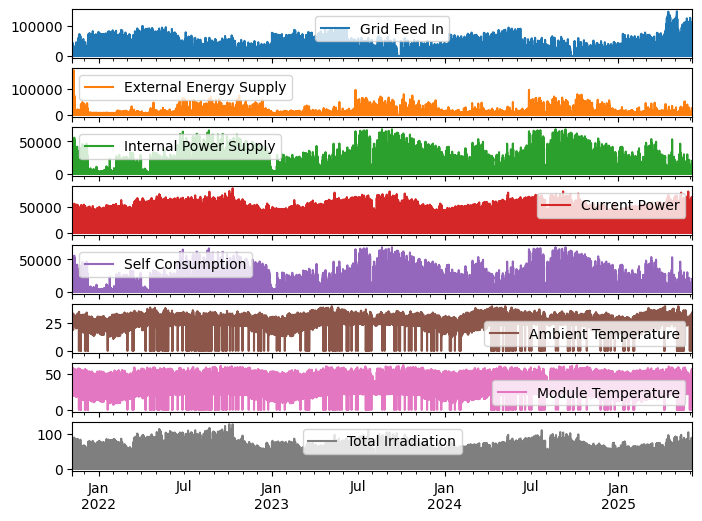

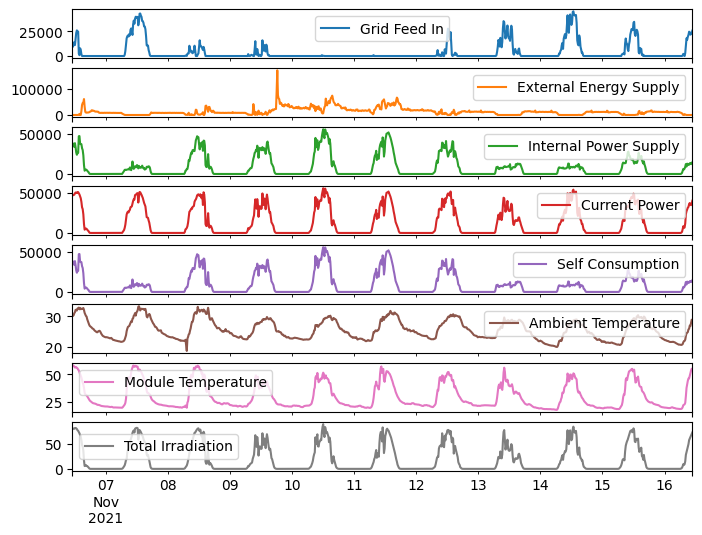

In [893]:
plot_features = df_filled[plot_cols]
plot_features.index = df_filled.index
_ = plot_features.plot(subplots=True)

plot_features = df_filled[plot_cols][:960]
plot_features.index = df_filled.index[:960]
_ = plot_features.plot(subplots=True)

In [894]:
# Rename the index
df = df_filled.rename_axis('Datetime')
df

,Grid Feed In,External Energy Supply,Internal Power Supply,Current Power,Self Consumption,Ambient Temperature,Module Temperature,Total Irradiation,is_weekend
Datetime,,,,,,,,,
2021-11-06 11:00:00,9080.8,0.000000,37015.066667,46095.866667,37015.066667,30.046667,57.706667,79.340000,True
2021-11-06 11:15:00,9427.4,1.600000,37756.825000,47184.225000,37756.825000,30.140833,58.147500,80.698333,True
2021-11-06 11:30:00,11218.2,258.000000,36041.425000,47259.625000,36041.425000,30.385833,57.361667,81.116667,True
2021-11-06 11:45:00,14011.4,0.000000,33460.216667,47471.616667,33460.216667,31.025833,57.097500,80.676667,True
2021-11-06 12:00:00,11030.2,0.000000,38093.108333,49123.308333,38093.108333,31.340000,56.047500,81.843333,True
...,...,...,...,...,...,...,...,...,...
2025-06-06 02:00:00,0.0,7181.052632,0.000000,0.000000,0.000000,24.973684,23.052632,0.000000,False
2025-06-06 02:15:00,0.0,6992.000000,0.000000,0.000000,0.000000,24.500000,22.866667,0.000000,False
2025-06-06 02:30:00,0.0,7336.000000,0.000000,0.000000,0.000000,24.533333,22.866667,0.000000,False


In [895]:
len(df)

125537

In [798]:
# Compressed CSV
df.to_csv(csv_file + '.gz', compression='gzip')